### Working with Dates and Times

 Date and time data comes in a few flavors:

Time stamps reference particular moments in time (e.g., April 1st, 2021 at 12:30pm).

Time intervals and periods reference a length of time between a particular beginning and end point; for example, the year 2020. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods comprising days).

Time deltas or durations reference an exact length of time (e.g., a duration of 22.56 seconds).

There are tools for dealing with dates and times in Python, as well as tools provided by Pandas. 

The time series tools provided by Pandas tend to be the most useful for data science applications.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from datetime import datetime

#### Dates and Times in Python

Python has a number of available representations of dates, times, deltas, and timespans. 

Python's basic objects for working with dates and times are in the built-in datetime module. 

The third-party dateutil module can be used to quickly perform a host of useful functions on dates and times. 

In [3]:
datetime(year=2021, month=4, day=1)

datetime.datetime(2021, 4, 1, 0, 0)

In [4]:
from dateutil import parser
date = parser.parse("1st of April, 2021")
date

datetime.datetime(2021, 4, 1, 0, 0)

In [5]:
date.strftime('%A')

'Thursday'

In [6]:
date.strftime('%b')

'Apr'

In [7]:
date.strftime('%d')

'01'

The last are examples of the standard string format codes for printing dates and times.

The power of datetime and dateutil lie in their flexibility and easy syntax.

You can use these objects and their built-in methods to easily perform many operations you might be interested in. 

They tend to break down when you want to work with large arrays of dates and times.

Just as lists of Python numerical variables are suboptimal compared to NumPy-style typed numerical arrays, lists of Python datetime objects are suboptimal compared to typed arrays of encoded dates.

#### Typed arrays of times: NumPy's datetime64
The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy. 

The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly. The datetime64 requires some specific input formatting.

In [13]:
date = np.array('2021-04-01', dtype=np.datetime64)
date

array('2021-04-01', dtype='datetime64[D]')

In [ ]:
np.datetime64('2021-04')

Specifying just the month, but forcing a ‘days’ unit:

In [8]:
np.datetime64('2021-04', 'D')


numpy.datetime64('2021-04-01')

In [10]:
np.datetime64('2021-04-01T12:30')

numpy.datetime64('2021-04-01T12:30')

In [11]:
np.datetime64('nat') # NaT not a time

numpy.datetime64('NaT')

Once we have this date formatted, however, we can do vectorized operations on it:

In [14]:
date + np.arange(12)

array(['2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04',
       '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
       '2021-04-09', '2021-04-10', '2021-04-11', '2021-04-12'],
      dtype='datetime64[D]')

Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large 

One detail of the datetime64 and timedelta64 objects is that they are built on a fundamental time unit. Because the datetime64 object is limited to 64-bit precision, the range of encodable times is $2^{64}$ times this fundamental unit. In other words, datetime64 imposes a trade-off between time resolution and maximum time span.

For example, if you want a time resolution of one nanosecond, you only have enough information to encode a range of $2^{64}$ nanoseconds, or just under 600 years. 

NumPy will infer the desired unit from the input; for example, here is a day-based datetime:

 Here is a day-based datetime:

In [10]:
np.datetime64('2021-04-01')

numpy.datetime64('2021-04-01')

Here is a minute-based datetime:

In [11]:
np.datetime64('2021-04-01 12:00')

numpy.datetime64('2021-04-01T12:00')

You can force any desired fundamental unit using one of many format codes; for example, here we'll force a nanosecond-based time:

In [12]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

The following table from the NumPy datetime64 documentation, lists the available format codes along with the relative and absolute timespans that they can encode:


    Code	Meaning	Time span (relative)	Time span (absolute)
    Y	Year	± 9.2e18 years	[9.2e18 BC, 9.2e18 AD]
    M	Month	± 7.6e17 years	[7.6e17 BC, 7.6e17 AD]
    W	Week	± 1.7e17 years	[1.7e17 BC, 1.7e17 AD]
    D	Day	± 2.5e16 years	[2.5e16 BC, 2.5e16 AD]
    h	Hour	± 1.0e15 years	[1.0e15 BC, 1.0e15 AD]
    m	Minute	± 1.7e13 years	[1.7e13 BC, 1.7e13 AD]
    s	Second	± 2.9e12 years	[ 2.9e9 BC, 2.9e9 AD]
    ms	Millisecond	± 2.9e9 years	[ 2.9e6 BC, 2.9e6 AD]
    us	Microsecond	± 2.9e6 years	[290301 BC, 294241 AD]
    ns	Nanosecond	± 292 years	[ 1678 AD, 2262 AD]
    ps	Picosecond	± 106 days	[ 1969 AD, 1970 AD]
    fs	Femtosecond	± 2.6 hours	[ 1969 AD, 1970 AD]
    as	Attosecond	± 9.2 seconds	[ 1969 AD, 1970 AD]

#### Dates and times in pandas

Pandas builds upon these tools to provide a Timestamp object, which combines the ease-of-use of datetime and dateutil with the efficient storage and vectorized interface of numpy.datetime64. 

From a group of Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series
or DataFrame.

For example, we can use Pandas tools to repeat the demonstration from above. We can parse a flexibly formatted string date, and use format codes to output the day of the week:

In [22]:
date = pd.to_datetime("1st of April, 2021")
date

Timestamp('2021-04-01 00:00:00')

In [23]:
date.strftime('%A')

'Thursday'

Additionally, we can do NumPy-style vectorized operations directly on this same object:

In [24]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04',
               '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
               '2021-04-09', '2021-04-10', '2021-04-11', '2021-04-12'],
              dtype='datetime64[ns]', freq=None)

### Pandas Time Series Data Structures
The fundamental Pandas data structures for working with time series data:

**Time stamps:** Pandas Timestamp type is essentially a replacement for Python's native datetime, but is based on the more efficient numpy.datetime64 data type. The associated Index structure is DatetimeIndex.

**Time Periods:** Pandas Period type encodes a fixed-frequency interval based on numpy.datetime64. The associated index structure is PeriodIndex.

**Time deltas:** Pandas Timedelta type provides a more efficient replacement for Python's native datetime.timedelta type, and is based on numpy.timedelta64. The associated index structure is TimedeltaIndex.

The most fundamental of these date/time objects are the Timestamp and DatetimeIndex objects. 

This class of objects can be invoked directly, but it is common to use the pd.to_datetime() function, which can parse a wide variety of formats. 

Passing a single date to pd.to_datetime() yields a Timestamp; passing a series of dates by default yields a DatetimeIndex:

In [27]:
dates = pd.to_datetime([datetime(2021, 3, 31), '1st of April, 2021',
                       '2021-Apr-2', '04-03-2021', '20210404'])
dates

DatetimeIndex(['2021-03-31', '2021-04-01', '2021-04-02', '2021-04-03',
               '2021-04-04'],
              dtype='datetime64[ns]', freq=None)

Any DatetimeIndex can be converted to a PeriodIndex with the to_period() function with the addition of a frequency code; here 'D' indicates daily frequency:

In [28]:
dates.to_period('D')

PeriodIndex(['2021-03-31', '2021-04-01', '2021-04-02', '2021-04-03',
             '2021-04-04'],
            dtype='period[D]', freq='D')

A TimedeltaIndex is created, for example, when a date is subtracted from another:

In [23]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '2 days', '3 days', '4 days'], dtype='timedelta64[ns]', freq=None)

### Pandas Time Series: Indexing by Time

Pandas time series tools become really useful in indexing data by timestamps. 

For example, we can construct a Series object that has time indexed data

In [25]:
index = pd.DatetimeIndex(['2020-03-01', '2020-04-01','2021-03-01', '2021-04-01'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2020-03-01    0
2020-04-01    1
2021-03-01    2
2021-04-01    3
dtype: int64

With this data in a Series, we can make use of any of the Series indexing patterns, passing values that can be coerced into dates.

In [17]:
data['2020-04-01':'2021-04-01']

2020-04-01    1
2021-03-01    2
2021-04-01    3
dtype: int64

There are additional special date-only indexing operations, such as passing a year to obtain a slice of all data from that year:

In [26]:
data['2021']

2021-03-01    2
2021-04-01    3
dtype: int64

#### Regular sequences: pd.date_range()

To make the creation of regular date sequences more convenient, Pandas offers a few functions for this purpose: 
pd.date_range() for timestamps, 
pd.period_range() for periods, 
pd.timedelta_range() for time deltas. 

We've seen that Python's range() and NumPy's np.arange() turn a startpoint, endpoint, and optional stepsize into a sequence. Similarly, pd.date_range() accepts a start date, an end date, and an optional frequency code to create a regular sequence of dates. By default, the frequency is one day:

In [24]:
pd.date_range('2021-03-31', '2021-04-10')

DatetimeIndex(['2021-03-31', '2021-04-01', '2021-04-02', '2021-04-03',
               '2021-04-04', '2021-04-05', '2021-04-06', '2021-04-07',
               '2021-04-08', '2021-04-09', '2021-04-10'],
              dtype='datetime64[ns]', freq='D')

Alternatively, the date range can be specified not with a start and endpoint, but with a startpoint and a number of periods:

In [25]:
pd.date_range('2021-04-01', periods=8, freq='H')

DatetimeIndex(['2021-04-01 00:00:00', '2021-04-01 01:00:00',
               '2021-04-01 02:00:00', '2021-04-01 03:00:00',
               '2021-04-01 04:00:00', '2021-04-01 05:00:00',
               '2021-04-01 06:00:00', '2021-04-01 07:00:00'],
              dtype='datetime64[ns]', freq='H')

To create regular sequences of Period or Timedelta values, the pd.period_range() and pd.timedelta_range() functions can be used. Here are some monthly periods:

In [26]:
pd.period_range('2021-01', periods=8, freq='M')

PeriodIndex(['2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
             '2021-07', '2021-08'],
            dtype='period[M]', freq='M')

And a sequence of durations increasing by an hour:

In [27]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

### Frequencies and Offsets

Fundamental to these Pandas time series tools is the concept of a frequency or date offset. Just as we saw the D (day) and H (hour) codes above, we can use such codes to specify any desired frequency spacing. The following table summarizes the main codes available:

    Code	Description	Code	Description
    D	Calendar day	B	Business day
    W	Weekly		
    M	Month end	BM	Business month end
    Q	Quarter end	BQ	Business quarter end
    A	Year end	BA	Business year end
    H	Hours	BH	Business hours
    T	Minutes		
    S	Seconds		
    L	Milliseonds		
    U	Microseconds		
    N	nanoseconds		

The monthly, quarterly, and annual frequencies are all marked at the end of the specified period. By adding an S suffix to any of these, they instead will be marked at the beginning:

    Code	Description		Code	Description
    MS	Month start		BMS	Business month start
    QS	Quarter start		BQS	Business quarter start
    AS	Year start		BAS	Business year start
    
Additionally, you can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix:

    Q-JAN, BQ-FEB, QS-MAR, BQS-APR, etc.
    A-JAN, BA-FEB, AS-MAR, BAS-APR, etc.

In the same way, the split-point of the weekly frequency can be modified by adding a three-letter weekday code:

    W-SUN, W-MON, W-TUE, W-WED, etc.
    
Also  codes can be combined with numbers to specify other frequencies. For example, for a frequency of 2 hours 30 minutes, we can combine the hour (H) and minute (T) codes as follows:

In [3]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

All of these short codes refer to specific instances of Pandas time series offsets, which can be found in the pd.tseries.offsets module. For example, we can create a business day offset directly as follows:

In [5]:
from pandas.tseries.offsets import BDay
pd.date_range('2021-04-01', periods=5, freq=BDay())

DatetimeIndex(['2021-04-01', '2021-04-02', '2021-04-05', '2021-04-06',
               '2021-04-07'],
              dtype='datetime64[ns]', freq='B')

The ability to use dates and times as indices to intuitively organize and access data is an important piece of the Pandas time series tools. 

The benefits of indexed data in general (automatic alignment during operations, intuitive data slicing and access, etc.) still apply, and Pandas provides several additional time series-specific operations.

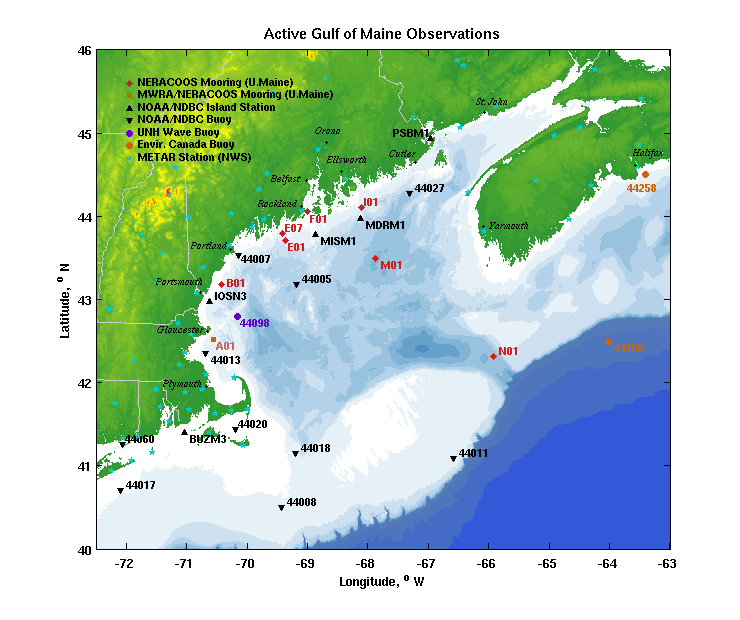

In [30]:
data=pd.read_csv(r'C:\Courses\DSE Practicum\Data\F0133_sbe37_realtime_20m.csv')

In [31]:
data.head()

,Time[GMT],salinity[psu](20m),sigma_t[kg/m^3](20m),conductivity[msiemens/cm](20m),temperature[C](20m)
0,2020-11-10 22:00,32.164,24.574,36.163,10.97
1,2020-11-10 23:00,32.316,24.716,36.200,10.83
2,2020-11-11 00:00,32.331,24.726,36.223,10.84
3,2020-11-11 01:00,32.404,24.789,36.262,10.80
4,2020-11-11 02:00,32.447,24.826,36.288,10.78


In [32]:
data.dtypes

Time[GMT]                          object
salinity[psu](20m)                float64
sigma_t[kg/m^3](20m)              float64
conductivity[msiemens/cm](20m)    float64
temperature[C](20m)               float64
dtype: object

In [35]:
data=pd.read_csv(r'C:\Courses\DSE Practicum\Data\F0133_sbe37_realtime_20m.csv', parse_dates=["Time[GMT]"]) 

In [36]:
data.dtypes

Time[GMT]                         datetime64[ns]
salinity[psu](20m)                       float64
sigma_t[kg/m^3](20m)                     float64
conductivity[msiemens/cm](20m)           float64
temperature[C](20m)                      float64
dtype: object

In [37]:
data.head()

,Time[GMT],salinity[psu](20m),sigma_t[kg/m^3](20m),conductivity[msiemens/cm](20m),temperature[C](20m)
0,2020-11-10 22:00:00,32.164,24.574,36.163,10.97
1,2020-11-10 23:00:00,32.316,24.716,36.200,10.83
2,2020-11-11 00:00:00,32.331,24.726,36.223,10.84
3,2020-11-11 01:00:00,32.404,24.789,36.262,10.80
4,2020-11-11 02:00:00,32.447,24.826,36.288,10.78


In [38]:
data=pd.read_csv(r'C:\Courses\DSE Practicum\Data\F0133_sbe37_realtime_20m.csv', index_col=["Time[GMT]"], parse_dates=["Time[GMT]"])

In [39]:
data.tail()

,salinity[psu](20m),sigma_t[kg/m^3](20m),conductivity[msiemens/cm](20m),temperature[C](20m)
Time[GMT],,,,
2021-03-31 15:00:00,31.925,25.307,30.251,4.34
2021-03-31 16:00:00,32.038,25.389,30.410,4.42
2021-03-31 17:00:00,32.093,25.429,30.484,4.45
2021-03-31 18:00:00,32.086,25.421,30.505,4.48
2021-03-31 19:00:00,32.131,25.456,30.549,4.49


In [40]:
data.dtypes

salinity[psu](20m)                float64
sigma_t[kg/m^3](20m)              float64
conductivity[msiemens/cm](20m)    float64
temperature[C](20m)               float64
dtype: object

In [43]:
data.index

DatetimeIndex(['2020-11-10 22:00:00', '2020-11-10 23:00:00',
               '2020-11-11 00:00:00', '2020-11-11 01:00:00',
               '2020-11-11 02:00:00', '2020-11-11 03:00:00',
               '2020-11-11 04:00:00', '2020-11-11 05:00:00',
               '2020-11-11 06:00:00', '2020-11-11 07:00:00',
               ...
               '2021-03-31 10:00:00', '2021-03-31 11:00:00',
               '2021-03-31 12:00:00', '2021-03-31 13:00:00',
               '2021-03-31 14:00:00', '2021-03-31 15:00:00',
               '2021-03-31 16:00:00', '2021-03-31 17:00:00',
               '2021-03-31 18:00:00', '2021-03-31 19:00:00'],
              dtype='datetime64[ns]', name='Time[GMT]', length=3382, freq=None)

In [21]:
data.columns

Index(['Time[GMT]', 'salinity[psu](20m)', 'sigma_t[kg/m^3](20m)',
       'conductivity[msiemens/cm](20m)', 'temperature[C](20m)'],
      dtype='object')

In [44]:
gm=data.rename(columns={'salinity[psu](20m)': 'Salinity', 
                            'sigma_t[kg/m^3](20m)': 'Sigma_t',
                            'conductivity[msiemens/cm](20m)': 'Conductivity',
                            'temperature[C](20m)': 'Temperature'})

For time series data, it’s conventional to represent the time component in the index of a Series or DataFrame so manipulations can be performed with respect to the time element.

One of the main uses for DatetimeIndex is as an index for pandas objects. The DatetimeIndex class contains many time series related optimizations.

A large range of dates for various offsets are pre-computed and cached under the hood in order to make generating subsequent date ranges very fast (just have to grab a slice).

Fast shifting using the shift method on pandas objects.

Unioning of overlapping DatetimeIndex objects with the same frequency is very fast (important for fast data alignment).

Quick access to date fields via properties such as year, month, etc.


In [6]:
 gm.head()

,Salinity,Sigma_t,Conductivity,Temperature
Time[GMT],,,,
2020-11-10 22:00:00,32.164,24.574,36.163,10.97
2020-11-10 23:00:00,32.316,24.716,36.200,10.83
2020-11-11 00:00:00,32.331,24.726,36.223,10.84
2020-11-11 01:00:00,32.404,24.789,36.262,10.80
2020-11-11 02:00:00,32.447,24.826,36.288,10.78


### Subset Pandas Dataframe By DateTime
Using a datetime index with Pandas makes it  easy to select data using attributes of the index such as month.

The datetime index can be accessed  by  passing in the year or year and month as strings


In [46]:
gm.loc["2020"]

,Salinity,Sigma_t,Conductivity,Temperature
Time[GMT],,,,
2020-11-10 22:00:00,32.164,24.574,36.163,10.97
2020-11-10 23:00:00,32.316,24.716,36.200,10.83
2020-11-11 00:00:00,32.331,24.726,36.223,10.84
2020-11-11 01:00:00,32.404,24.789,36.262,10.80
2020-11-11 02:00:00,32.447,24.826,36.288,10.78
...,...,...,...,...
2020-12-31 19:00:00,32.185,25.244,32.449,6.68
2020-12-31 20:00:00,32.143,25.215,32.385,6.65
2020-12-31 21:00:00,32.157,25.224,32.412,6.66


In [45]:
s2020=gm.loc["2020"]

In [47]:
gm.loc["2020-12"]

,Salinity,Sigma_t,Conductivity,Temperature
Time[GMT],,,,
2020-12-01 00:00:00,32.126,24.857,34.465,9.08
2020-12-01 01:00:00,31.992,24.756,34.312,9.05
2020-12-01 02:00:00,32.052,24.799,34.395,9.08
2020-12-01 03:00:00,32.044,24.800,34.340,9.02
2020-12-01 04:00:00,32.072,24.821,34.377,9.04
...,...,...,...,...
2020-12-31 19:00:00,32.185,25.244,32.449,6.68
2020-12-31 20:00:00,32.143,25.215,32.385,6.65
2020-12-31 21:00:00,32.157,25.224,32.412,6.66


In [51]:
dec=gm.loc["2020-12"]

This starts on the very first time in the month, and includes the last date and time for the month:

In [48]:
gm["2021-1":"2021-2"]

,Salinity,Sigma_t,Conductivity,Temperature
Time[GMT],,,,
2021-01-01 00:00:00,32.016,25.136,32.127,6.48
2021-01-01 01:00:00,32.103,25.191,32.304,6.59
2021-01-01 02:00:00,31.845,25.024,31.822,6.30
2021-01-01 03:00:00,31.454,24.734,31.334,6.14
2021-01-01 04:00:00,31.545,24.806,31.424,6.15
...,...,...,...,...
2021-02-28 19:00:00,32.345,25.725,29.876,3.47
2021-02-28 20:00:00,32.345,25.728,29.848,3.43
2021-02-28 21:00:00,32.318,25.711,29.787,3.39


This specifies an exact stop time (and is not the same as the above):

In [11]:
gm["2021-1":"2021-2-28 00:00:00"]

,Salinity,Sigma_t,Conductivity,Temperature
Time[GMT],,,,
2021-01-01 00:00:00,32.016,25.136,32.127,6.48
2021-01-01 01:00:00,32.103,25.191,32.304,6.59
2021-01-01 02:00:00,31.845,25.024,31.822,6.30
2021-01-01 03:00:00,31.454,24.734,31.334,6.14
2021-01-01 04:00:00,31.545,24.806,31.424,6.15
...,...,...,...,...
2021-02-27 20:00:00,32.360,25.733,29.924,3.51
2021-02-27 21:00:00,32.363,25.735,29.928,3.51
2021-02-27 22:00:00,32.322,25.713,29.801,3.40


This stops on the included end-point as it is part of the index:

In [14]:
gm["2021-1-15":"2021-1-15 12:00:00"]

,Salinity,Sigma_t,Conductivity,Temperature
Time[GMT],,,,
2021-01-15 00:00:00,32.103,25.311,31.465,5.61
2021-01-15 01:00:00,32.069,25.284,31.438,5.61
2021-01-15 02:00:00,31.913,25.170,31.231,5.53
2021-01-15 03:00:00,31.878,25.141,31.211,5.54
2021-01-15 04:00:00,31.926,25.181,31.229,5.51
2021-01-15 05:00:00,31.992,25.236,31.274,5.50
2021-01-15 06:00:00,31.988,25.227,31.312,5.55
2021-01-15 07:00:00,32.061,25.286,31.370,5.54
2021-01-15 08:00:00,32.204,25.397,31.507,5.55


### Resampling and converting frequencies
One common need for time series data is resampling at a higher or lower frequency. This can be done using the resample() method, or the simpler asfreq() method. The primary difference between the two is that resample() is fundamentally a data aggregation, while asfreq() is fundamentally a data selection.

resample groups data by a given periodicity. asfreq actually resamples data and is a concise way of changing the frequency of a DatetimeIndex object


asfreq returns the original data conformed to a new index with the specified frequency. resample is more appropriate if an operation, such as summarization, is necessary to represent the data at the new frequency.


In [50]:
gm.head()

,Salinity,Sigma_t,Conductivity,Temperature
Time[GMT],,,,
2020-11-10 22:00:00,32.164,24.574,36.163,10.97
2020-11-10 23:00:00,32.316,24.716,36.200,10.83
2020-11-11 00:00:00,32.331,24.726,36.223,10.84
2020-11-11 01:00:00,32.404,24.789,36.262,10.80
2020-11-11 02:00:00,32.447,24.826,36.288,10.78


In [9]:
gm.resample("2H").mean()

,Salinity,Sigma_t,Conductivity,Temperature
Time[GMT],,,,
2020-11-10 22:00:00,32.2400,24.6450,36.1815,10.900
2020-11-11 00:00:00,32.3675,24.7575,36.2425,10.820
2020-11-11 02:00:00,32.4430,24.8225,36.2850,10.785
2020-11-11 04:00:00,32.3620,24.7525,36.2435,10.830
2020-11-11 06:00:00,32.4145,24.7995,36.2645,10.795
...,...,...,...,...
2021-03-31 10:00:00,31.8835,25.2830,30.1380,4.250
2021-03-31 12:00:00,31.8370,25.2450,30.1065,4.260
2021-03-31 14:00:00,31.8950,25.2870,30.1930,4.305


In [49]:
gm.asfreq("2H")

,Salinity,Sigma_t,Conductivity,Temperature
Time[GMT],,,,
2020-11-10 22:00:00,32.164,24.574,36.163,10.97
2020-11-11 00:00:00,32.331,24.726,36.223,10.84
2020-11-11 02:00:00,32.447,24.826,36.288,10.78
2020-11-11 04:00:00,32.439,24.821,36.279,10.78
2020-11-11 06:00:00,32.428,24.812,36.268,10.78
...,...,...,...,...
2021-03-31 10:00:00,32.063,25.421,30.327,4.29
2021-03-31 12:00:00,31.884,25.282,30.149,4.26
2021-03-31 14:00:00,31.865,25.267,30.135,4.27


In [52]:
dec.shape

(744, 4)

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

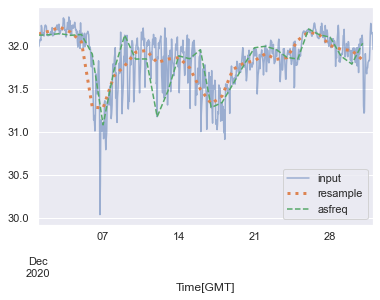

In [55]:
dec['Salinity'].plot(alpha=0.5, style='-')
dec['Salinity'].resample('D').mean().plot(style=':', linewidth=3.0)
dec['Salinity'].asfreq('D').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='lower right');

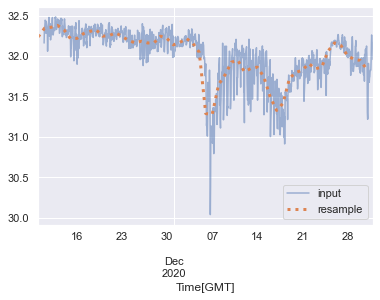

In [40]:
s2020['Salinity'].plot(alpha=0.5, style='-')
s2020['Salinity'].resample('D').mean().plot(style=':', linewidth=3.0)
#s2020['Salinity'].asfreq('D').plot(style='--',linewidth=3.0);
plt.legend(['input', 'resample'],
           loc='lower right');